ALUNO: PEDRO NÍCOLLAS PEREIRA LEON LOPES

### 10. Regressão com KNN

Aplique KNN para realizar uma tarefa de regressão em um conjunto de dados como Airfoil Self-Noise.

Compare o desempenho do modelo com a regressão linear usando MSE.

In [1]:
# DATASET UTILIZADO -> AiroilSelfNoise (data/AiroilSelfNoise.csv)

In [2]:
# Conjunto de Importações
import pandas as pd
import numpy as np

In [3]:
dados = pd.read_csv("data/AirfoilSelfNoise.csv")            # lendo o .csv

In [4]:
dados.head()            # vendo o cabeçalho do .csv

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


Separando em amostra de treino e teste

In [5]:
from sklearn.model_selection import train_test_split
# Atribuindo valores para X e Y
X = dados.drop(['SSPL'], axis=1)
Y = dados['SSPL']

In [6]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.30,random_state=0)           # separação de 30% para teste e 70% para treino

Aplicando modelo KNN (K-Nearest Neighbors) e Regressão Linear

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [8]:
# KNN
modelo_KNN = KNeighborsRegressor()
modelo_KNN.fit(X_treino, Y_treino)

KNeighborsRegressor()

In [9]:
# Realizando previsões na amostra de teste (KNN)
Y_previsto_KNN = modelo_KNN.predict(X_teste)

In [10]:
# Regressão Linear
modelo_LIN = LinearRegression()
modelo_LIN.fit(X_treino, Y_treino)

LinearRegression()

In [11]:
# Realizando previsões na amostra de teste (Regressão Linear)
Y_previsto_LIN = modelo_LIN.predict(X_teste)

# RESULTADOS FINAIS (MSE)

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
# RESULTADOS KNN
mse_knn = mean_squared_error(Y_teste, Y_previsto_KNN)
print(f"KNN MSE: {mse_knn}")

KNN MSE: 37.145828333037706


In [14]:
# RESULTADOS REGRESSÃO LINEAR
mse_linear = mean_squared_error(Y_teste, Y_previsto_LIN)
print(f"REGRESSÃO LINEAR MSE: {mse_linear}")

REGRESSÃO LINEAR MSE: 22.395946643814206


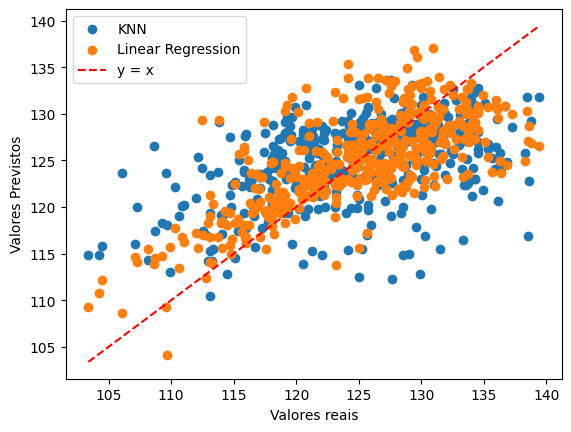

In [15]:
# COMPARAÇÃO DAS DUAS       (quanto mais bolinha perto da reta, melhor)

import matplotlib.pyplot as plt

plt.scatter(Y_teste, Y_previsto_KNN, label='KNN')
plt.scatter(Y_teste, Y_previsto_LIN, label='Linear Regression')
plt.plot([min(Y_teste), max(Y_teste)], [min(Y_teste), max(Y_teste)], color='red', linestyle='--', label='y = x')        # Traçar a linha de igualdade (y = x)
plt.xlabel('Valores reais')
plt.ylabel('Valores Previstos')
plt.legend()                                                                                                            # legenda
plt.show()